# Collin Wyer 14103001
## Lab 3

# Task 1. 
## A. Import Python Modules and Dataset

In [6]:
# Load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import manifold # needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster # needed for k-Means clustering
from sklearn import preprocessing # needed for scaling attributes to the nterval [0,1]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



In [10]:
# Style plot
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('dark_background')

## B. Load the dataset

In [8]:
df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype=float)

print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


## C. Rescale Data
The below rescalers were experimented with and it was decided that #2 Standard Scaler and #3 Robust Scaler were optimal.

#### 1. Min/Max Scaler

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

#### 2. Standard Scaler

In [221]:
stand_scaler = preprocessing.StandardScaler()
data = stand_scaler.fit_transform(data)

#### 3. Robust Scaler

In [ ]:
robust_scaler = preprocessing.RobustScaler()
data = robust_scaler.fit_transform(data)

#### 4. Normalizer

In [ ]:
norm_scaler = preprocessing.Normalizer()
data = norm_scaler.fit_transform(data)

#### 5. MaxAbs

In [ ]:
maxabs_scaler = preprocessing.MaxAbsScaler()
data = maxabs_scaler.fit_transform(data)

## D. Scatterplot Function for visualization

`clustering_scatterplot()` creates the 2D scatter plot of the clustered dataset.

In [21]:
colors = np.array(['r', 'b', 'orange', 'lightgreen', 'pink', 'lightblue', 'green', 'purple', 'blue', 'red', 'yellow', 'khaki'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the center of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='lime', marker='s', s=200)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

# Task 2.
A. Use the k-Means clustering algorithm and visualise the clustering. Aim at producing a meaningful clustering that allows you to describe the clusters with words.

#### Run k-Means

In [223]:
# number of clusters
k = 9

n_init and max_inter can be altered to desired settings simply by changing their values below. 

In [224]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=100, max_iter=3000).fit(data)

### A. Apply a manifold-learning technique to project the data set to a 2D space
Append the cluster centers to the dataset.

In [225]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### A1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space
Project both the data and the k-Means cluster centers to 2D.

In [226]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

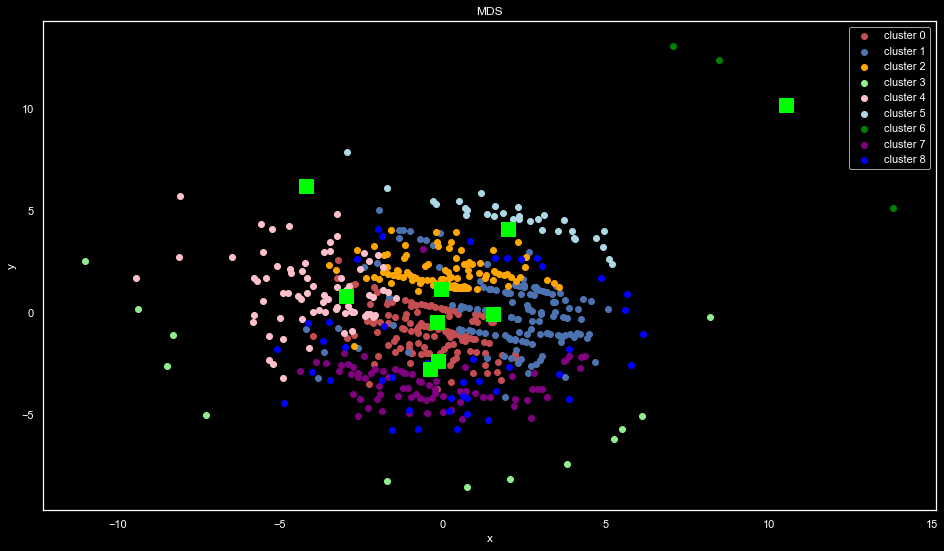

In [227]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')
plt.grid(False)

#### A2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space
Project both the data and the k-Means cluster centers to 2D.

In [228]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

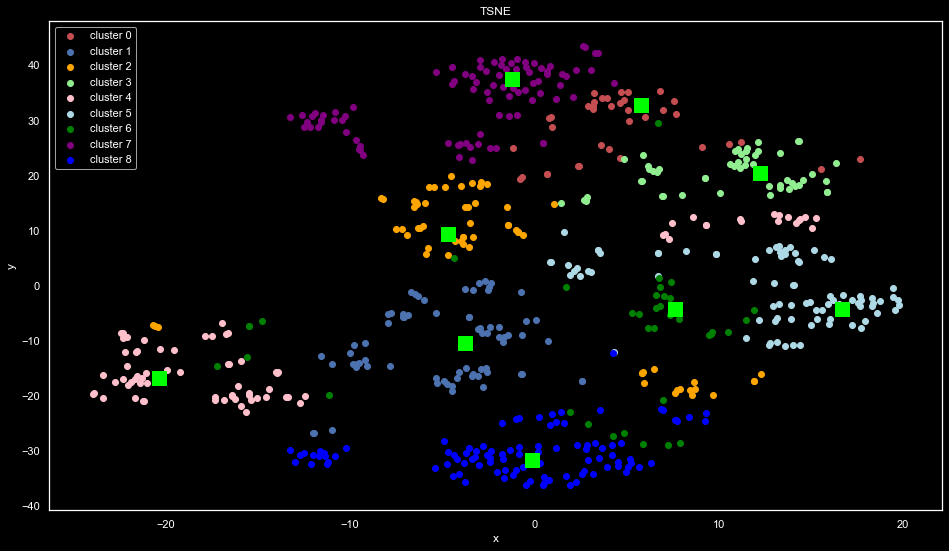

In [23]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')
plt.grid(False)

### Cluster Analysis 

#### Add the cluster labels as an extra column in the original dataframe

In [24]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

#### Compute the mean value of each attribute for each cluster

In [25]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.252252,1.407931,1.437579,0.706081,0.891892,0.837838,0.027027,0.648649,0.000000,0.378378,0.027027,0.027027,0.000000,1.000000,0.675676,1.484507
1,0.319249,0.768481,0.965117,0.715845,0.985915,0.929577,0.000000,0.676056,0.000000,0.126761,0.070423,1.000000,0.492958,0.000000,0.760563,0.697852
2,0.301587,0.795285,1.024747,0.714286,0.000000,0.888889,0.047619,0.761905,0.000000,0.095238,0.015873,0.380952,0.285714,0.333333,0.000000,0.751623
3,0.050314,0.752923,0.835517,0.726415,0.905660,0.547170,0.018868,0.000000,0.018868,0.037736,0.075472,0.113208,0.000000,1.000000,0.660377,0.562948
4,0.079167,0.853957,0.972822,0.743125,0.900000,0.325000,0.012500,0.000000,0.025000,0.125000,0.062500,0.112500,0.762500,0.000000,0.712500,0.702256
5,0.226190,0.858446,1.096759,0.708036,0.976190,0.952381,0.023810,0.738095,0.000000,0.130952,0.059524,0.000000,0.000000,0.000000,0.797619,0.878851
6,0.405405,1.929943,1.682108,0.712838,0.864865,0.810811,0.108108,0.729730,0.000000,0.324324,0.054054,0.027027,0.513514,0.054054,0.594595,1.851387
7,0.355805,0.769152,0.980169,0.675000,0.988764,0.966292,0.000000,1.000000,0.000000,0.078652,0.067416,0.247191,0.000000,1.000000,0.797753,0.730392
8,0.266667,0.858333,1.108187,0.721750,1.000000,0.850000,0.010000,1.000000,0.000000,0.110000,0.030000,0.000000,1.000000,0.000000,0.910000,0.845162


#### Conclusion (for this iteration)
We can see that the clusters are relatively well defined. There is some leakage mainly from cluster 2 (orange) and cluster 4 (pink). We can argue the following based on the clusters;
* Cluster 6 (green) have the most dependants, highest applicant income, most likely self-employed and have the highest total income.
* Cluster 7 (purple) have the lowest term amount, mostly male, married and lives urban. 
* Cluster 8 (blue) have the best credit history,are married, are graduates, live semi-urban and have the highest number of successfu loan applicants. 

# Task 3. 
Plot the sum of squared distances from the data points to the centers of the k-Means clusters for various values of k. Use the Elbow method to pick the best value of k. If it suggests a different value of k (from the one you used in Task 2), then compute a new k-Means clustering.

##  K-means Clustering

### Deciding on the optimum # of clusters 'K' using;
#### 1. Elbow method
#### 2. Silhouette method

#### 1. Elbow
K=(n) determines the number of clusters and is derived using the concept of minimizing within cluster sum of square (WCSS). As K increases WCSS decreases and results in a scree plot with an elbow effect. The # of clusters at the elbow generally gives a good indication of the optimum # of clusters

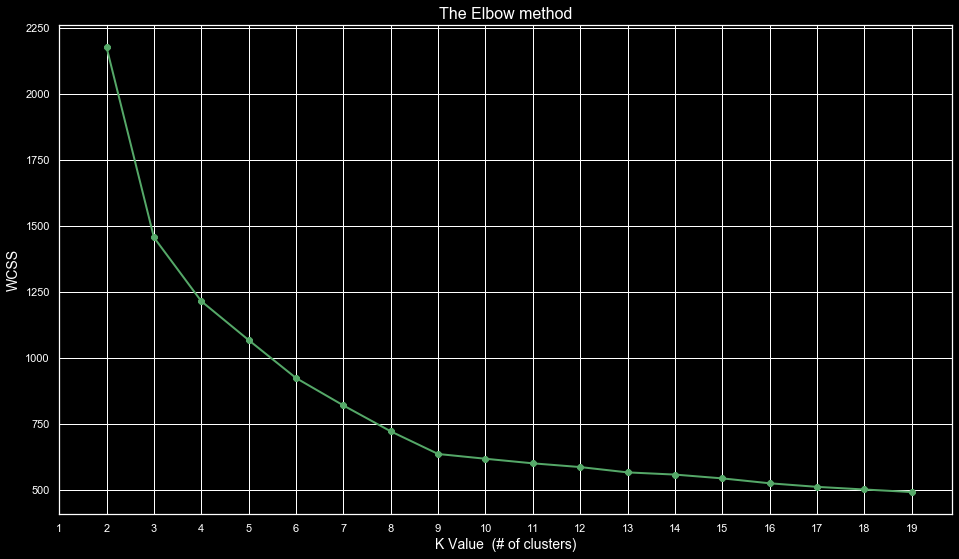

In [26]:
wcss = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.title("The Elbow method",fontsize=16)    
plt.grid(True)
plt.plot(range(2,20),wcss, linewidth=2, c="g", marker ="8")
plt.xlabel("K Value  (# of clusters)", fontsize=14)
plt.xticks(np.arange(1,20,1))
plt.ylabel("WCSS", fontsize=14)
plt.show()

Based on the above elbow plot, $k$ could lie (arguably) anywhere between 3 and 10. 
For this iteration we will consider k = 9, which is the same as the first iteration.

Using an alternative method, we will attempt to obtain a different k value.

#### 2. Average Silhouette Method
Measures the quality of the clustering - it determines how well each data point resides in the cluster. High silhouette width indicates good clustering. This method computes the average silhouette of observations for different values of $k$

In [35]:
km_scores= []
km_silhouette = []

for i in range(2,15):
    km = KMeans(n_clusters=i, random_state=0).fit(data)
    preds = km.predict(data)
    
   # print("Cluster score # {}: {}".format(i,km.score(data)))
    km_scores.append(-km.score(data))
    
    silhouette = silhouette_score(data,preds)
    km_silhouette.append(silhouette)
   # print("Silhouette score {}: {}\n".format(i,silhouette))

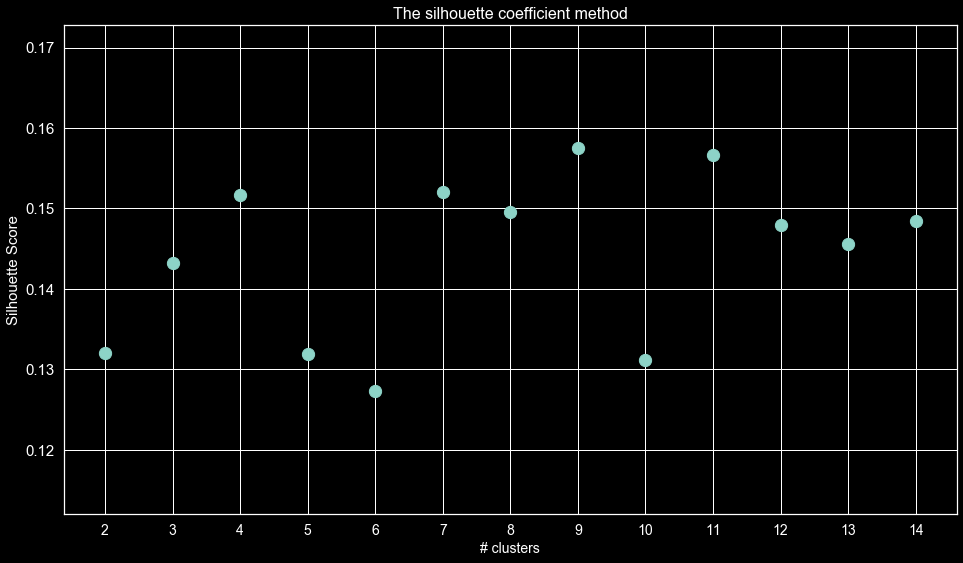

In [36]:
plt.title("The silhouette coefficient method",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_silhouette,s=150)
plt.grid(True)
plt.xlabel("# clusters",fontsize=14)
plt.ylabel("Silhouette Score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

k = 9 is suggested, but as it is the same as before we will choose the next optimum value, k = 11.

### Standard Scaler

In [37]:
stand_scaler = preprocessing.StandardScaler()
data = stand_scaler.fit_transform(data)

#### Run k-Means

In [48]:
# number of clusters
k = 11

n_init and max_inter can be altered to desired settings simply by changing their values below. After many iterations, the values used seemed to work well.

In [49]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=100, max_iter=3000).fit(data)

### A. Apply a manifold-learning technique to project the data set to a 2D space
Append the cluster centers to the dataset.

In [50]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

####  Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space
Project both the data and the k-Means cluster centers to 2D.

In [51]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

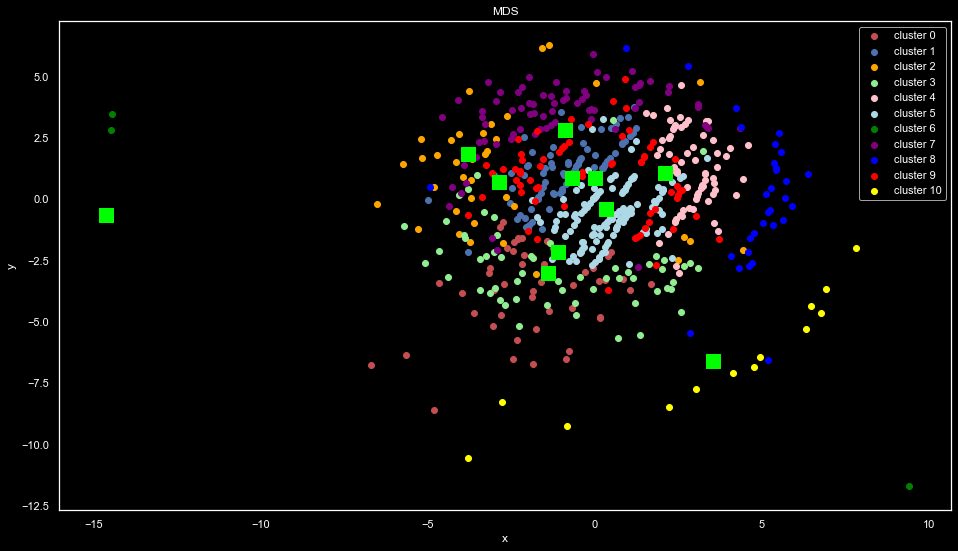

In [52]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')
plt.grid(False)

####  Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space
Project both the data and the k-Means cluster centers to 2D.

In [53]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

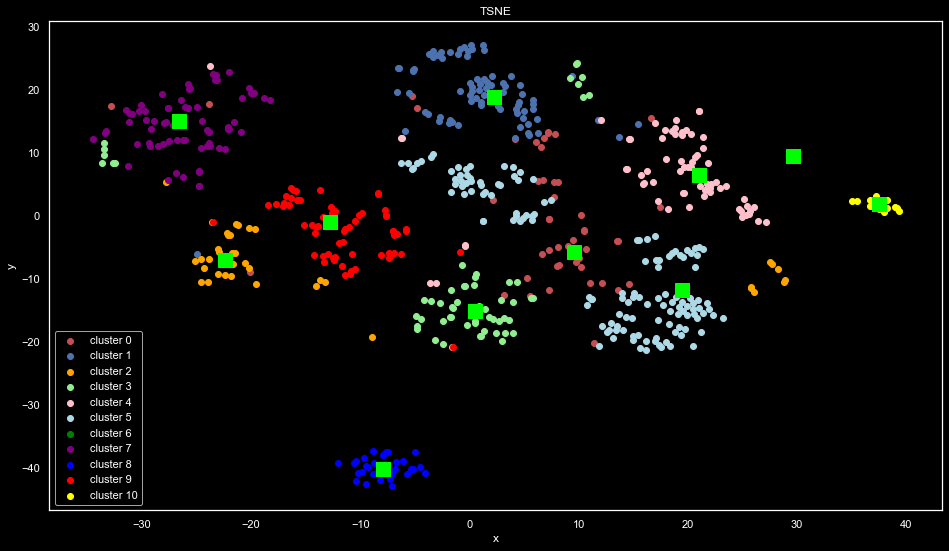

In [54]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')
plt.grid(False)

#### We can see the clusters are well defined. There is some leakage, mainly from Cluster 5 (lightblue), and a little from cluster 2(orange) and cluster 3 (lime).

### Cluster Analysis - Standard_Scaler k = 11

In [61]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [62]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.319444,1.738192,1.653490,0.729167,0.916667,0.916667,0.0,0.687500,0.0,0.083333,0.020833,0.000000,0.312500,0.291667,0.604167,1.686698
1,0.240506,0.814452,0.957148,0.751582,1.000000,0.949367,0.0,0.708861,0.0,0.012658,0.000000,0.000000,0.000000,1.000000,0.784810,0.752677
2,0.368421,0.860272,0.921057,0.305921,0.973684,0.921053,0.0,0.868421,0.0,0.078947,0.000000,0.368421,0.342105,0.447368,0.789474,0.810811
3,0.305085,1.159676,1.195490,0.724576,0.898305,0.864407,0.0,0.661017,0.0,1.000000,0.000000,0.203390,0.372881,0.288136,0.694915,1.102036
4,0.083333,0.765187,0.889038,0.753676,0.985294,0.000000,0.0,0.220588,0.0,0.058824,0.000000,0.161765,0.485294,0.250000,0.794118,0.606185
5,0.206813,0.817340,1.096694,0.751825,1.000000,1.000000,0.0,0.759124,0.0,0.000000,0.000000,0.000000,0.635036,0.000000,0.861314,0.820942
6,0.000000,1.082057,1.154812,0.750000,1.000000,0.666667,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.666667,0.333333,1.000000,0.874694
7,0.251142,0.794331,1.017371,0.722603,0.000000,0.794521,0.0,0.616438,0.0,0.082192,0.000000,0.342466,0.315068,0.369863,0.054795,0.720449
8,0.236559,0.796500,1.069091,0.713710,0.967742,0.741935,0.0,0.548387,0.0,0.000000,1.000000,0.193548,0.322581,0.354839,0.709677,0.825340



We can argue the following from the above;
* Cluster 10 (yellow) are not male and are most likely married.
* Cluster 7 (purple) have the worst credit history and worst loan status.
* Cluster 4 (pink) are female and have the lowest loan amount
* Cluster 6 (green) have the fewest dependants, the best credit history, are single, are not self-employed, are graduates, most likely live semi-urban and all granted loans. (v few in numbers)
* Cluster 9 (red) have the lowest applicant income, highest credit history, most likely male, not a graduate and 2nd lowest total income.

### Robust Scaler

In [63]:
robust_scaler = preprocessing.RobustScaler()
data = robust_scaler.fit_transform(data)

#### 1. Elbow
K=(n) determines the number of clusters and is derived using the concept of minimizing within cluster sum of square (WCSS). As K increases WCSS decreases and results in a scree plot with an elbow effect. The # of clusters at the elbow generally gives a good indication of the optimum # of clusters

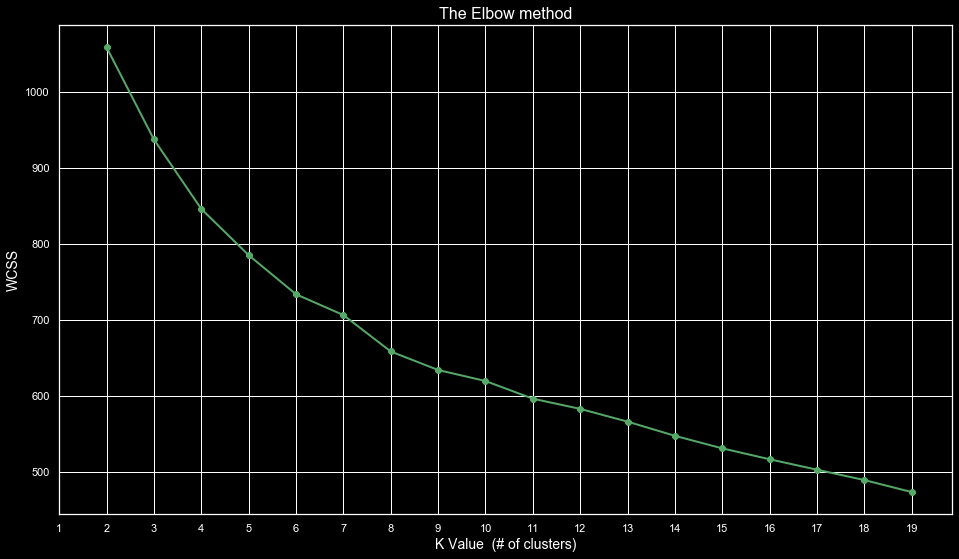

In [11]:
wcss = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.title("The Elbow method",fontsize=16)    
plt.grid(True)
plt.plot(range(2,20),wcss, linewidth=2, c="g", marker ="8")
plt.xlabel("K Value  (# of clusters)", fontsize=14)
plt.xticks(np.arange(1,20,1))
plt.ylabel("WCSS", fontsize=14)
plt.show()

$k$ could lie between 6, 12...it is ambiguous. Agentle slope makes it hard to determine $k$

#### 2. Average Silhouette Method
Measures the quality of the clustering - it determines how well each data point resides in the cluster. High silhouette width indicates good clustering. This method computes the average silhouette of observations for different values of $k$

In [12]:
km_scores= []
km_silhouette = []

for i in range(2,15):
    km = KMeans(n_clusters=i, random_state=0).fit(data)
    preds = km.predict(data)
    
   # print("Cluster score # {}: {}".format(i,km.score(data)))
    km_scores.append(-km.score(data))
    
    silhouette = silhouette_score(data,preds)
    km_silhouette.append(silhouette)
   # print("Silhouette score {}: {}\n".format(i,silhouette))

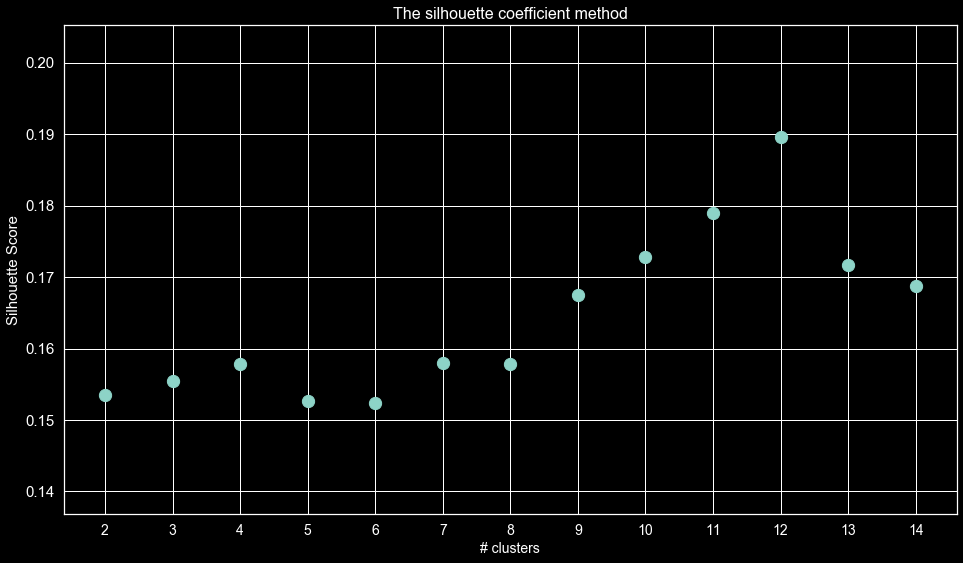

In [13]:
plt.title("The silhouette coefficient method",fontsize=16)
plt.scatter(x=[i for i in range(2,15)],y=km_silhouette,s=150)
plt.grid(True)
plt.xlabel("# clusters",fontsize=14)
plt.ylabel("Silhouette Score",fontsize=15)
plt.xticks([i for i in range(2,15)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Silhouette suggests $k$ = 12

#### 3. PCA Projection

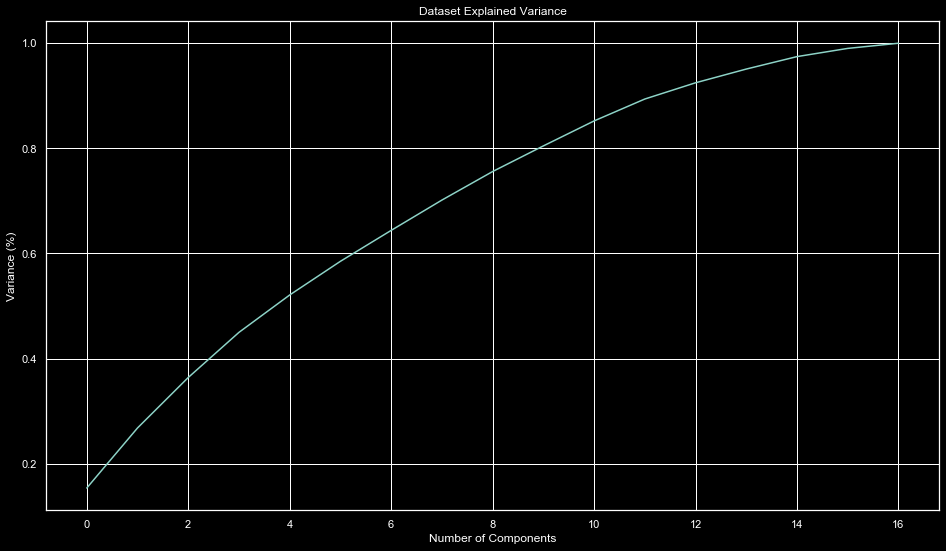

In [55]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

The goal of PCA is to reduce dimensionality by projecting it onto a smaller subspace where Eigenvectors will form the axes. Because eigenvectors have equal length they can only define the directions of the new axes. The idea is that by choosing the optimum k value the k feature space is sufficient to describe the rest of the dataset and retain accuracy. 
From the above we can see that the first 9 components would contain ~ 80% of the variance, whereas you would require 16 components to describe 100% of the variance. 

In [56]:
pca = PCA(n_components=12)
dataset = pca.fit_transform(data)

In [57]:
data_mean = np.mean(data)

In [58]:
data_center = data - data_mean

In [59]:
cov_matrix = np.cov(data_center)

In [60]:
eigenval, eigenvec = np.linalg.eig(cov_matrix)

C:\Users\wyer2\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


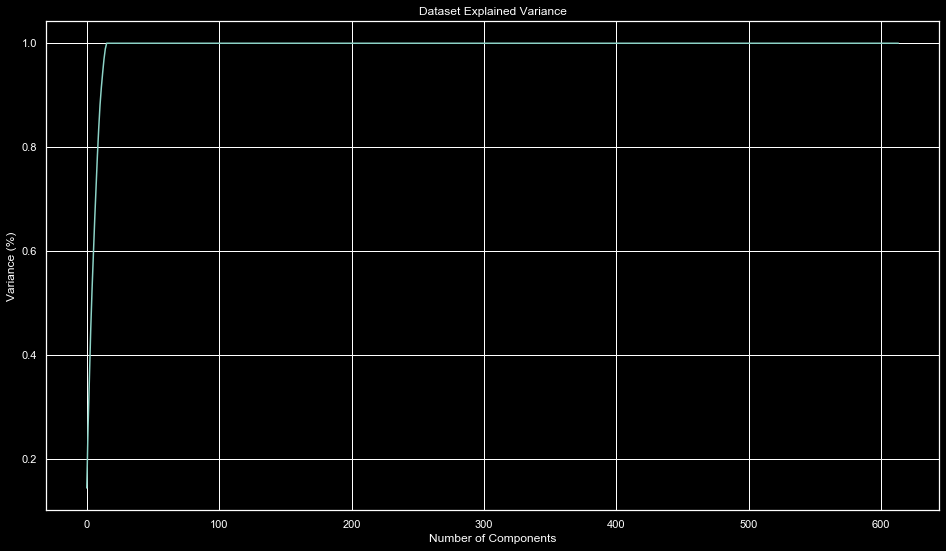

In [61]:
significance = [np.abs(i)/np.sum(eigenval) for i in eigenval]
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(significance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [63]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=12)

X_pca = pca.fit_transform(data)

manual_var = np.sum(np.var(X_pca, axis=0) / np.sum(np.var(data, axis=0)))
print("Manual explained var ratio   :", manual_var)
print("Built-in explianed var ratio :", np.sum(pca.explained_variance_ratio_))

Manual explained var ratio   : 0.8938628587440639
Built-in explianed var ratio : 0.8938628587440639


In [64]:
from sklearn.metrics import explained_variance_score

# （PCA.explained_variance_ratio_
var_score = explained_variance_score(data, pca.inverse_transform(X_pca))
print("Explained variance score : ", var_score)
print()

Explained variance score :  0.893862858744063



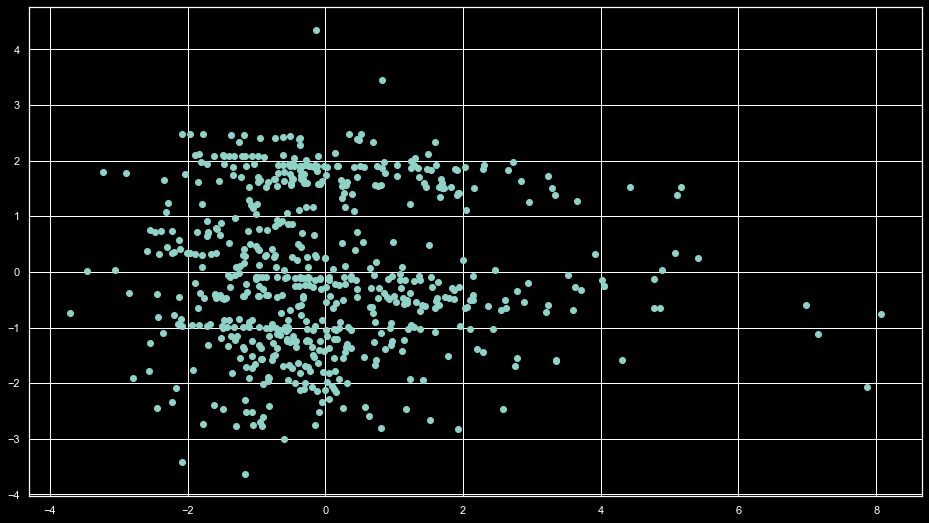

In [70]:
from sklearn.decomposition import PCA
pca_lab3 = PCA(n_components=2)
principalComponents_lab3 = pca.fit_transform(data)
plt.scatter(principalComponents_lab3[:,0], principalComponents_lab3[:,1])
plt.show()

In [ ]:
principal_Df = pd.DataFrame(data = principalComponents_lab3
             , columns = ['principal component 1', 'principal component 2'])
principal_Df.tail()

#### Run k-Means

In [14]:
# number of clusters
k = 12

## NOTE:
n_init and max_inter can be altered to desired settings simply by changing their values below. 

In [17]:
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=1000, max_iter=3500).fit(data)

### A. Apply a manifold-learning technique to project the data set to a 2D space
Append the cluster centers to the dataset.

In [18]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

#### A1. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space
Project both the data and the k-Means cluster centers to 2D.

In [25]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

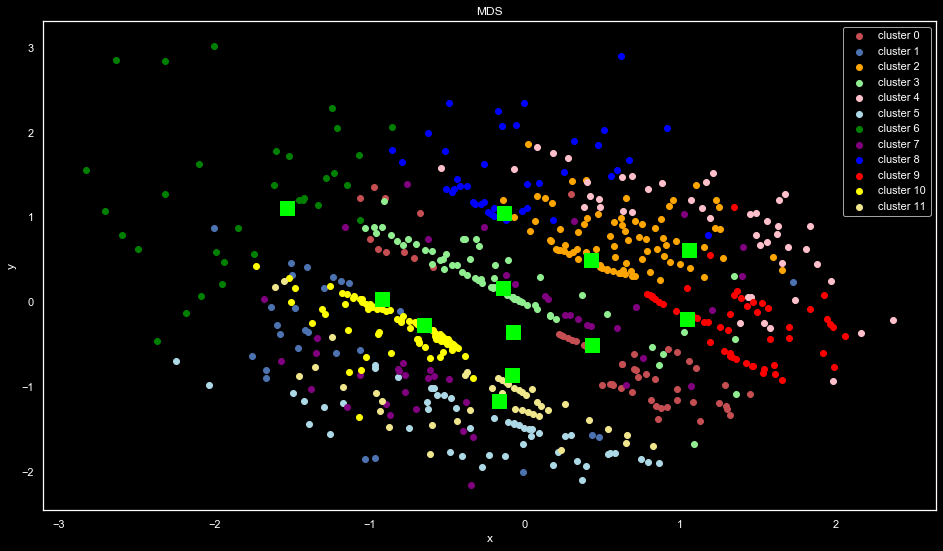

In [26]:
plt.rcParams['figure.figsize'] = (16, 9)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')
plt.grid(False)

#### A2. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space
Project both the data and the k-Means cluster centers to 2D.

In [27]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

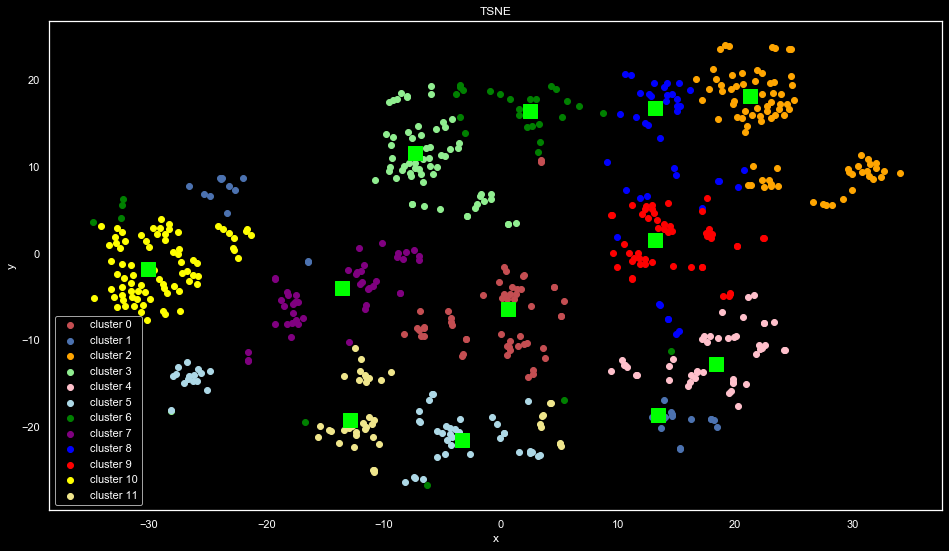

In [28]:
plt.rcParams['figure.figsize'] = (16, 9)
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')
plt.grid(False)

### Cluster Analysis for Robust_Scaler k = 12
There is good definition and good distance between some clusters and there is a little leakage, mainly from cluster 8 (blue) and cluster 5 (lightblue).

In [29]:
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df.index)

In [30]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.080247,0.875634,1.030101,0.756944,0.981481,0.648148,0.000000,0.000000,0.000000,0.092593,0.074074,0.296296,0.000000,0.000000,0.703704,0.787153
1,0.493827,0.853161,1.195525,0.726852,0.407407,0.888889,0.074074,1.000000,0.000000,0.074074,0.074074,0.259259,1.000000,0.000000,0.000000,0.893176
2,0.365079,0.749198,0.967900,0.675000,0.988095,0.976190,0.000000,1.000000,0.000000,0.083333,0.047619,0.261905,0.000000,1.000000,0.821429,0.713487
3,0.264550,0.845339,1.087643,0.694048,0.984127,0.936508,0.031746,1.000000,0.000000,0.142857,0.063492,0.000000,0.000000,0.000000,0.777778,0.872445
4,0.253623,0.812442,1.021257,0.701087,0.000000,0.891304,0.021739,0.717391,0.000000,0.108696,0.000000,0.434783,0.000000,0.478261,0.000000,0.771398
5,0.124183,0.850780,0.979690,0.715686,0.862745,0.000000,0.058824,0.294118,0.019608,0.156863,0.078431,0.098039,1.000000,0.000000,0.764706,0.717694
6,0.364583,2.054265,1.785145,0.714844,0.875000,0.812500,0.093750,0.781250,0.000000,0.312500,0.062500,0.031250,0.406250,0.156250,0.656250,1.968215
7,0.420290,0.735328,0.989669,0.720109,0.978261,0.891304,0.000000,1.000000,0.000000,0.130435,0.065217,1.000000,0.478261,0.000000,0.804348,0.681664
8,0.258333,1.329678,1.321352,0.693750,0.900000,0.800000,0.025000,0.675000,0.000000,0.325000,0.075000,0.025000,0.000000,1.000000,0.650000,1.391361


We can argue the following based on the above;
* Cluster 10 (yellow) have one of the longest loan terms, a great credit history, are male, married, are graduates, live semi-urban and have all been granted a loan.
* Cluster 2 (orange) have the lowest loan term, most likely male, married, live urban and have one of the lowest total incomes.
* Cluster 0 (pale red) have the lowest loan term, are single and have not disclosed where they live.
* Cluster 9 (red) have the least dependants, one of the lowest applicant incomes, are single, lowest number of self-employed and the lowest total income.
* Cluster 6 (green) have the highest applicant income, higest loan amount and higest total income.



# Task 4.
Apply another clustering algorithm to the same dataset and an appropriate manifold-learning technique to visualise the clustering.

In [36]:
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc


In [33]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
data = scaler.fit_transform(df) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(data) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized)

In [53]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

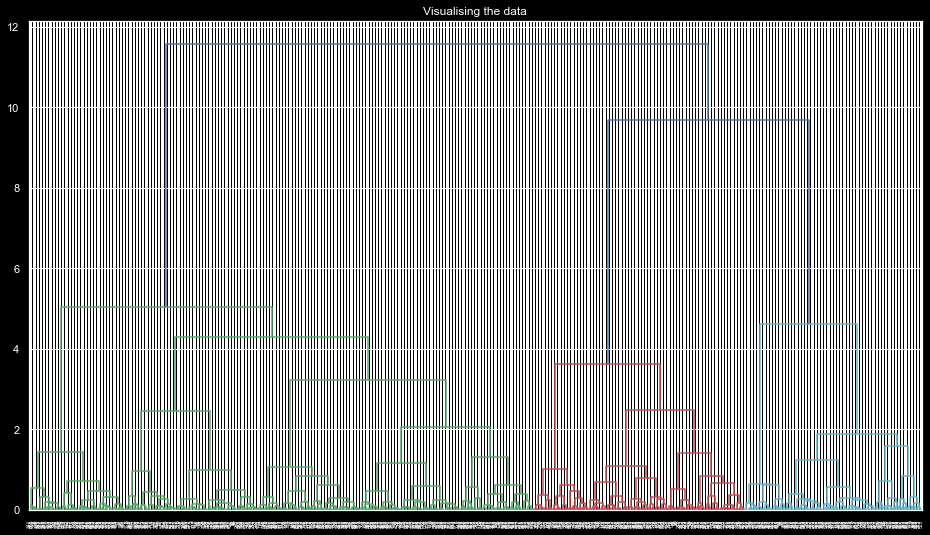

In [54]:
# %matplotlib inline
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

In [42]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(data)
labels = model.labels_

In [212]:
k = 2

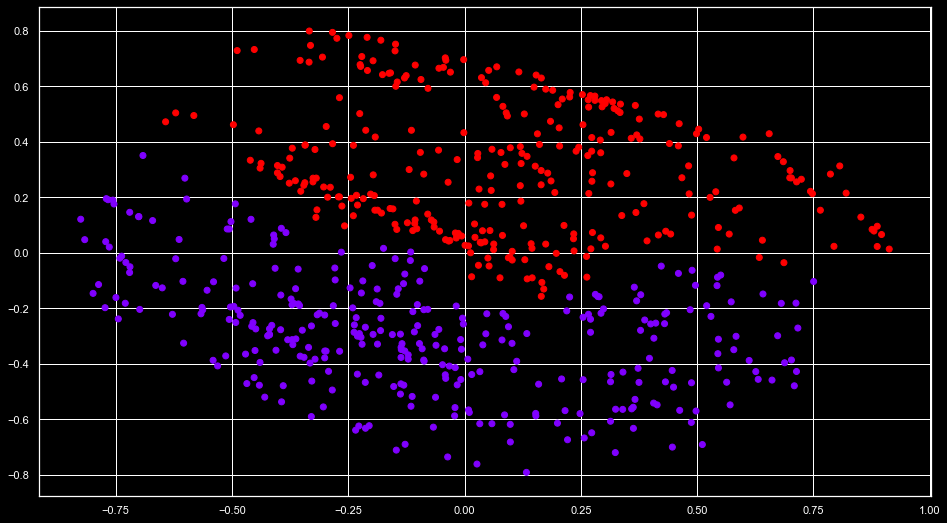

In [213]:
AggClust2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
#plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AggClust2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

In [ ]:
k = 5

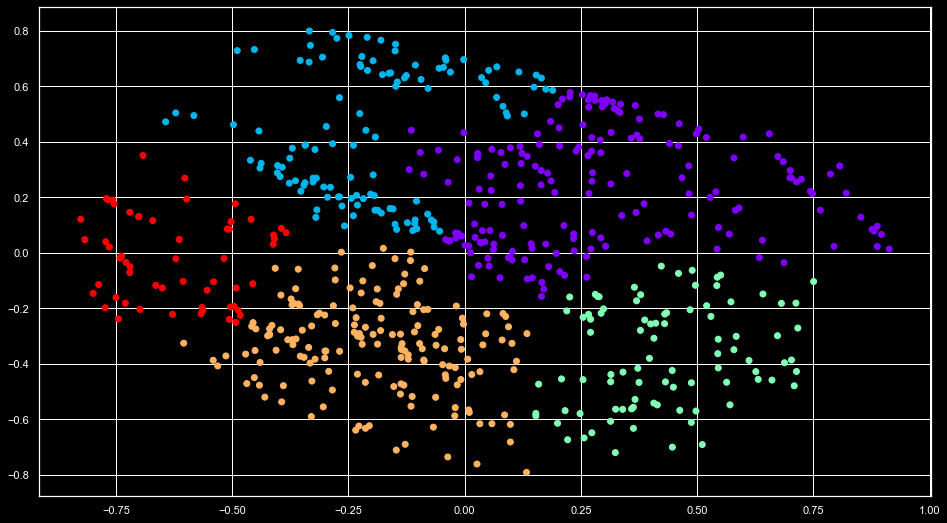

In [161]:
AggClust5 = AgglomerativeClustering(n_clusters = 5) 
  
# Visualizing the clustering 
#plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AggClust5.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

In [165]:
k = 9

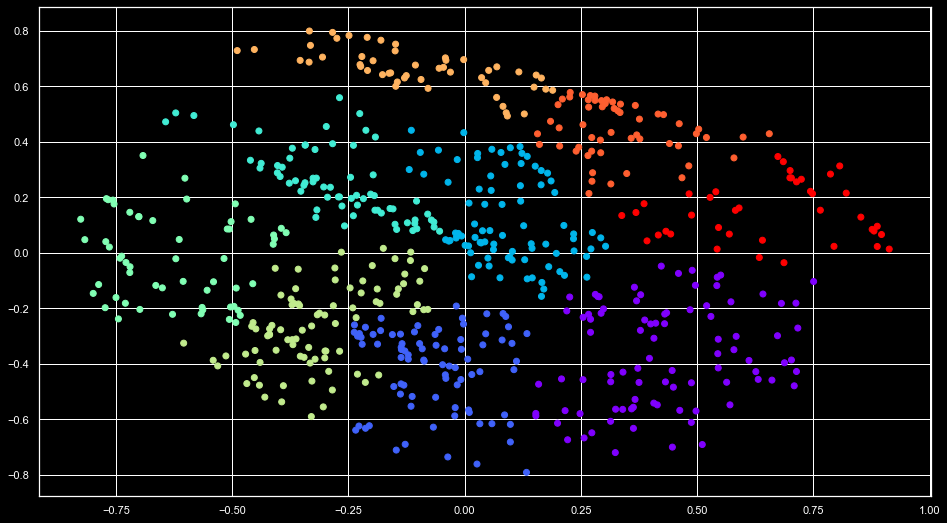

In [170]:
AggClust9 = AgglomerativeClustering(n_clusters = 9) 
  
# Visualizing the clustering 
#plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AggClust9.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

In [179]:
k = 10

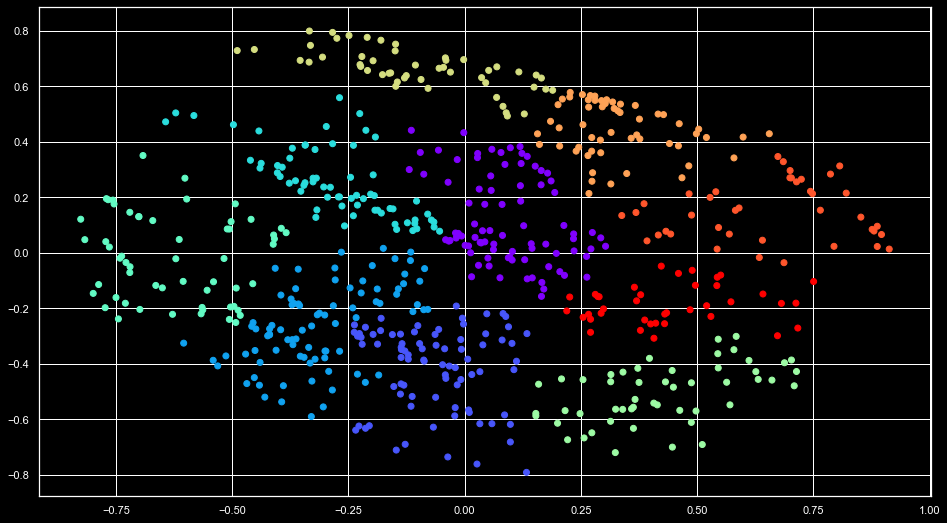

In [180]:
AggClust10 = AgglomerativeClustering(n_clusters = 10) 
# Visualizing the clustering 
#plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AggClust10.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

In [183]:
k = 11

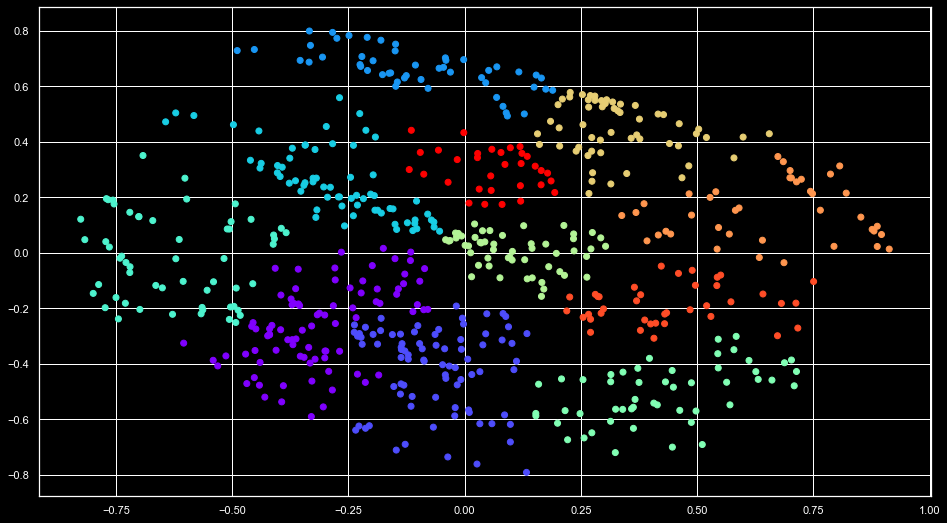

In [184]:
AggClust11 = AgglomerativeClustering(n_clusters = 11) 
# Visualizing the clustering 
#plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AggClust11.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

In [214]:
k = 14

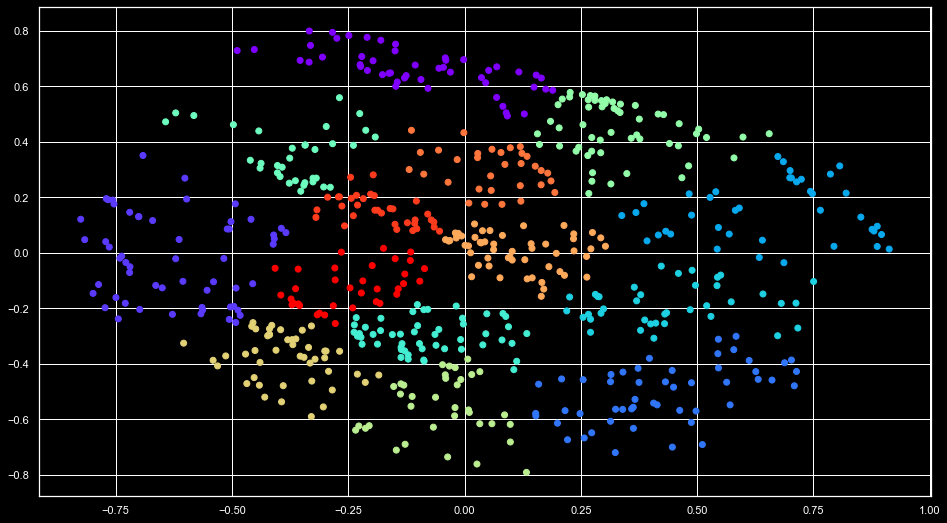

In [215]:
AggClust14 = AgglomerativeClustering(n_clusters = 14) 
# Visualizing the clustering 
#plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = AggClust14.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 

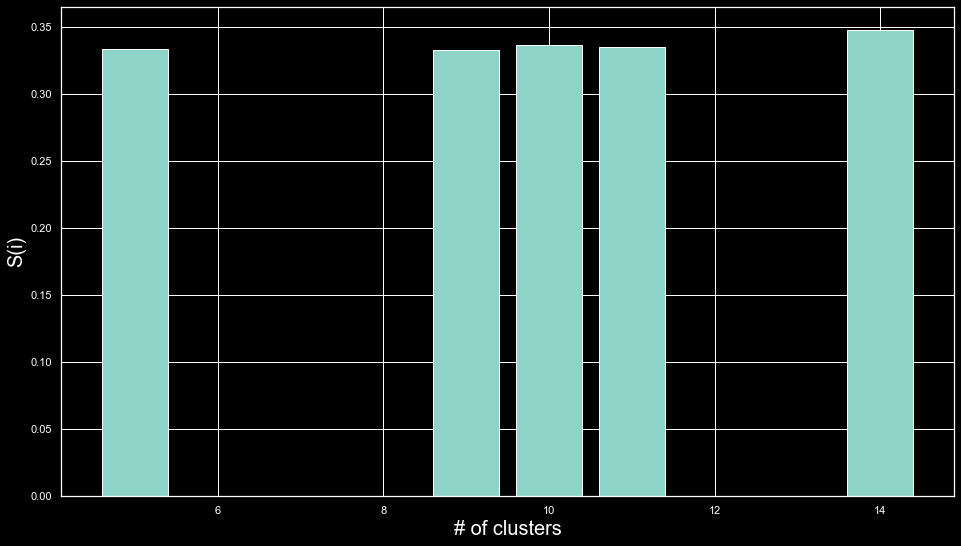

In [216]:
k = [5 ,9, 10, 11, 14] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, AggClust5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, AggClust9.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, AggClust10.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, AggClust11.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, AggClust14.fit_predict(X_principal)))
  
# Plot bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('# of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

It would appear as though k = 14 is optimal, in this instance.